# DCN


# 1. Install & Import Packages

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/tobigs14_conference/Deep & Cross Network (DCN)

/content/drive/MyDrive/tobigs14_conference/Deep & Cross Network (DCN)


In [3]:
!pip install -q tensorflow-recommenders
!pip install -q --upgrade tensorflow-datasets

     |████████████████████████████████| 51kB 3.0MB/s 
     |████████████████████████████████| 3.7MB 7.3MB/s 


In [4]:
import sys

import os
import pandas as pd

import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

import pprint

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

import tensorflow as tf
import tensorflow_recommenders as tfrs

from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Lambda, Input, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import LambdaCallback, EarlyStopping, Callback
from tensorflow.keras.utils import plot_model
import glob

# 2. Preprocess

In [5]:
add_train = pd.read_json('/content/drive/MyDrive/tobigs14_conference/data/v_2/wine_meta/train_all_meta_v2.json')
add_test = pd.read_json('/content/drive/MyDrive/tobigs14_conference/data/v_2/wine_meta/test_all_meta_v2.json')

In [6]:
add_train.head()

,index,user_note,rating_per_user,vintage_id,user_like_count,userID,wine_id,wine_name,url,like,name,rating_count,rating_average,rating_distribution,label_count,review_count,type_id,body,acidity,alcohol,food,grapes,grapes_id,grapes_count,grape_composition,rank,region_id,region_name,country_code,country_most_used_grapes_id,country_most_used_grapes_name,country_most_used_grapes_wines_count,winery_id,winery_name,winery_ratings_count,winery_ratings_average,winery_labels_count,winery_wines_count,user_follower_count,user_following_count,user_rating_count,user_rating_sum,reviews_count
0,0,Soooo good 💕,4.0,164942680,0,19484511,1141133,Prestige Rosé Brut ChampagnenN.V.,/taittinger-prestige-rose-brut-champagne/w/114...,1,Prestige Rosé Brut Champagne,5248.0,4.1,"{'1': 22, '2': 68, '3': 853, '4': 3447, '5': 858}",18046.0,1798.0,3.0,3.0,3.0,12.0,"[Pork, Rich fish (salmon, tuna etc), Shellfish...","[Chardonnay, Pinot Noir, Pinot Meunier]","[5, 14, 110]","[510440, 483935, 30275]","{'14': 70, '5': 30}",{'country': {'description': 'Rank within Franc...,409.0,Champagne,fr,"[14, 10, 5]","[Pinot Noir, Merlot, Chardonnay]","[483935, 482768, 510440]",1285.0,Taittinger,90187.0,4.2,454478.0,39.0,34,65,383,1453.0,323
1,1,"Belíssimo champanhe rose, bem seco mais com mu...",4.0,164942680,2,352674,1141133,Prestige Rosé Brut ChampagnenN.V.,/taittinger-prestige-rose-brut-champagne/w/114...,1,Prestige Rosé Brut Champagne,5248.0,4.1,"{'1': 22, '2': 68, '3': 853, '4': 3447, '5': 858}",18046.0,1798.0,3.0,3.0,3.0,12.0,"[Pork, Rich fish (salmon, tuna etc), Shellfish...","[Chardonnay, Pinot Noir, Pinot Meunier]","[5, 14, 110]","[510440, 483935, 30275]","{'14': 70, '5': 30}",{'country': {'description': 'Rank within Franc...,409.0,Champagne,fr,"[14, 10, 5]","[Pinot Noir, Merlot, Chardonnay]","[483935, 482768, 510440]",1285.0,Taittinger,90187.0,4.2,454478.0,39.0,425,915,382,1516.5,297
2,4,,4.0,164942680,0,17786617,1141133,Prestige Rosé Brut ChampagnenN.V.,/taittinger-prestige-rose-brut-champagne/w/114...,1,Prestige Rosé Brut Champagne,5248.0,4.1,"{'1': 22, '2': 68, '3': 853, '4': 3447, '5': 858}",18046.0,1798.0,3.0,3.0,3.0,12.0,"[Pork, Rich fish (salmon, tuna etc), Shellfish...","[Chardonnay, Pinot Noir, Pinot Meunier]","[5, 14, 110]","[510440, 483935, 30275]","{'14': 70, '5': 30}",{'country': {'description': 'Rank within Franc...,409.0,Champagne,fr,"[14, 10, 5]","[Pinot Noir, Merlot, Chardonnay]","[483935, 482768, 510440]",1285.0,Taittinger,90187.0,4.2,454478.0,39.0,46,75,412,1589.0,170
3,5,Perfekt med gratinerede østers.,4.5,164942680,0,8078038,1141133,Prestige Rosé Brut ChampagnenN.V.,/taittinger-prestige-rose-brut-champagne/w/114...,1,Prestige Rosé Brut Champagne,5248.0,4.1,"{'1': 22, '2': 68, '3': 853, '4': 3447, '5': 858}",18046.0,1798.0,3.0,3.0,3.0,12.0,"[Pork, Rich fish (salmon, tuna etc), Shellfish...","[Chardonnay, Pinot Noir, Pinot Meunier]","[5, 14, 110]","[510440, 483935, 30275]","{'14': 70, '5': 30}",{'country': {'description': 'Rank within Franc...,409.0,Champagne,fr,"[14, 10, 5]","[Pinot Noir, Merlot, Chardonnay]","[483935, 482768, 510440]",1285.0,Taittinger,90187.0,4.2,454478.0,39.0,13,10,412,1465.0,392
4,6,Delicious!,4.0,164942680,0,3014532,1141133,Prestige Rosé Brut ChampagnenN.V.,/taittinger-prestige-rose-brut-champagne/w/114...,0,Prestige Rosé Brut Champagne,5248.0,4.1,"{'1': 22, '2': 68, '3': 853, '4': 3447, '5': 858}",18046.0,1798.0,3.0,3.0,3.0,12.0,"[Pork, Rich fish (salmon, tuna etc), Shellfish...","[Chardonnay, Pinot Noir, Pinot Meunier]","[5, 14, 110]","[510440, 483935, 30275]","{'14': 70, '5': 30}",{'country': {'description': 'Rank within Franc...,409.0,Champagne,fr,"[14, 10, 5]","[Pinot Noir, Merlot, Chardonnay]","[483935, 482768, 510440]",1285.0,Taittinger,90187.0,4.2,454478.0,39.0,5,0,410,1639.5,394


In [7]:
str_features = ["userID", "country_code", 'wine_id', 'grapes_id']
int_features = ["type_id", "body", "acidity", 'user_like_count', 'rating_count', 'alcohol']
label_feature=["like"]
feature_names = str_features + int_features + label_feature

In [15]:
import sys
sys.path.append(os.path.join('/content/drive/MyDrive/tobigs14_conference/Deep & Cross Network (DCN)', 'Preprocess'))
sys.path.append(os.path.join('/content/drive/MyDrive/tobigs14_conference/Deep & Cross Network (DCN)', 'Models'))

In [16]:
from dcn_preprocess_junyoung import DCN_preprocessing
import DCN
import imp
imp.reload(DCN)

<module 'DCN' from '/content/drive/MyDrive/tobigs14_conference/Deep & Cross Network (DCN)/Models/DCN.py'>

In [17]:
add_train=add_train[feature_names]
add_test=add_test[feature_names]

In [18]:
cached_train, vocabularies = DCN_preprocessing(add_train, str_features, int_features, df_type='train')
cached_test = DCN_preprocessing(add_test, str_features, int_features, df_type = 'test')

In [19]:
vocabularies

{'acidity': array([1, 2, 3]),
 'alcohol': array([  0,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
         15,  16,  17,  18,  19,  20,  21,  80, 112, 114, 135]),
 'body': array([1, 2, 3, 4, 5]),
 'country_code': array([b'ar', b'at', b'au', b'br', b'ca', b'ch', b'cl', b'de', b'es',
        b'fr', b'gb', b'gr', b'hu', b'il', b'it', b'jp', b'lu', b'mx',
        b'nz', b'pt', b'ru', b'un', b'us', b'uy', b'za'], dtype=object),
 'grapes_id': array([b'0', b'1', b'10', b'100', b'1005', b'1006', b'101', b'1011',
        b'1019', b'102', b'103', b'1030', b'1032', b'1033', b'1034',
        b'104', b'1044', b'105', b'106', b'1072', b'1074', b'108', b'109',
        b'1098', b'11', b'110', b'111', b'1116', b'112', b'1121', b'114',
        b'115', b'1156', b'116', b'1175', b'1176', b'1178', b'118',
        b'1185', b'119', b'12', b'120', b'122', b'1222', b'123', b'1232',
        b'124', b'1262', b'1265', b'1266', b'127', b'128', b'1281',
        b'1282', b'1285', b'129', b'1291', b'1

In [20]:
learning_rate = 0.001
model = DCN.model(str_features = str_features,
                        int_features = int_features,
                        cross_layer_sizes = 1,
                        learning_rate=learning_rate,
                        vocabularies=vocabularies,
                        deep_layer_sizes=[192, 192], projection_dim=None)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate))

# Train

In [21]:
from keras.callbacks import EarlyStopping
callback = tf.keras.callbacks.EarlyStopping(monitor='binary_accuracy', patience=20)

In [22]:
history= model.fit(cached_train,  epochs=500, verbose=True, callbacks=[callback])

Epoch 1/500
87/87 [==============================] - 13s 119ms/step - binary_accuracy: 0.6404 - loss: 0.6282 - regularization_loss: 0.0000e+00 - total_loss: 0.6282
Epoch 2/500
87/87 [==============================] - 3s 34ms/step - binary_accuracy: 0.7261 - loss: 0.5401 - regularization_loss: 0.0000e+00 - total_loss: 0.5401
Epoch 3/500
87/87 [==============================] - 3s 34ms/step - binary_accuracy: 0.7477 - loss: 0.5076 - regularization_loss: 0.0000e+00 - total_loss: 0.5076
Epoch 4/500
87/87 [==============================] - 3s 34ms/step - binary_accuracy: 0.7615 - loss: 0.4829 - regularization_loss: 0.0000e+00 - total_loss: 0.4829
Epoch 5/500
87/87 [==============================] - 3s 34ms/step - binary_accuracy: 0.7722 - loss: 0.4638 - regularization_loss: 0.0000e+00 - total_loss: 0.4638
Epoch 6/500
87/87 [==============================] - 3s 34ms/step - binary_accuracy: 0.7780 - loss: 0.4515 - regularization_loss: 0.0000e+00 - total_loss: 0.4515
Epoch 7/500
87/87 [=======

In [23]:
DCN.getResult(model, cached_test, metric = 'binary')

ROC: 0.9565316452775086
              precision    recall  f1-score   support

           0       0.93      0.91      0.92     81030
           1       0.92      0.94      0.93     93416

    accuracy                           0.93    174446
   macro avg       0.93      0.92      0.92    174446
weighted avg       0.93      0.93      0.93    174446



In [24]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_6 (Sequential)    (None, 64)                256       
_________________________________________________________________
sequential_9 (Sequential)    (None, 64)                1600      
_________________________________________________________________
sequential_5 (Sequential)    (None, 64)                384       
_________________________________________________________________
sequential_1 (Sequential)    (None, 64)                1664      
_________________________________________________________________
sequential_3 (Sequential)    (None, 64)                25536     
_________________________________________________________________
sequential_8 (Sequential)    (None, 64)                495296    
_________________________________________________________________
sequential_4 (Sequential)    (None, 64)                448   

In [25]:
import seaborn as sns
plt.style.use('seaborn') # seaborn 스타일로 변환
sns.set(rc={'figure.figsize' : (15,15)})

<Figure size 1800x1800 with 0 Axes>

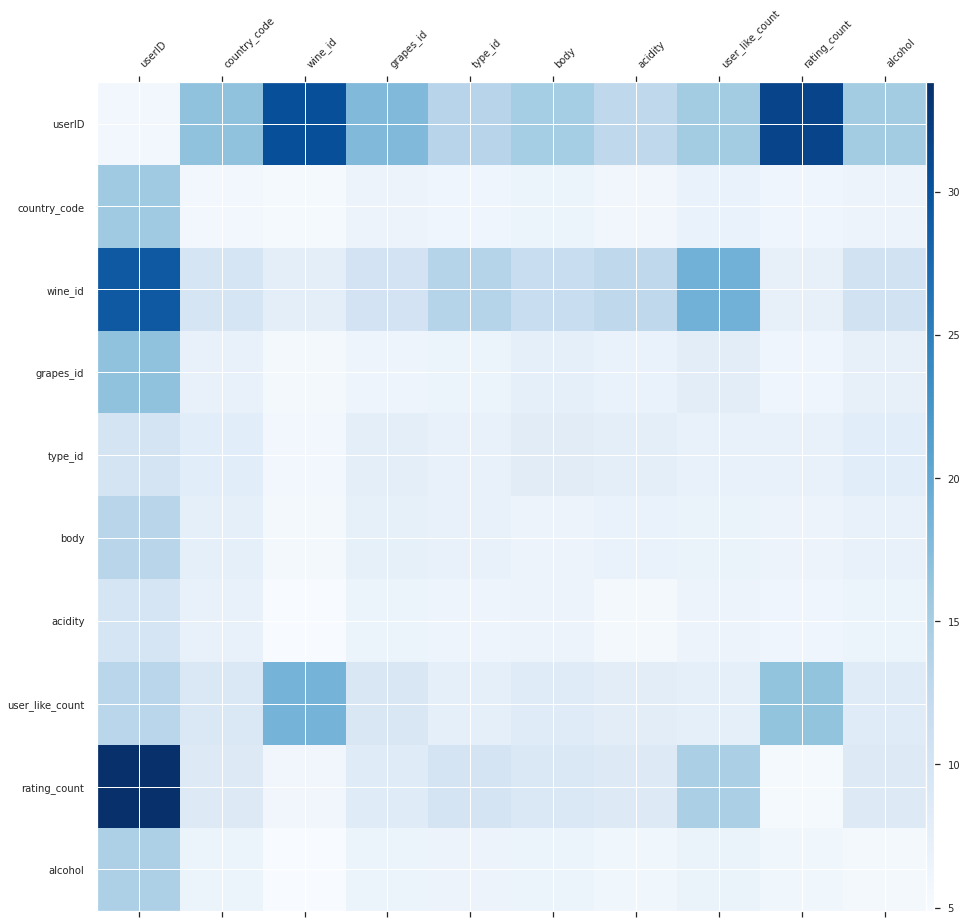

In [26]:
# Cross layer 1 weights
try:
    mat = model._cross_layer[0]._dense.kernel
    features = model._all_features
    block_norm = np.ones([len(features), len(features)])

    dim = model.embedding_dimension

    # Compute the norms of the blocks.
    for i in range(len(features)):
        for j in range(len(features)):
            block = mat[i * dim:(i + 1) * dim,
                        j * dim:(j + 1) * dim]
            block_norm[i,j] = np.linalg.norm(block, ord="fro")

    plt.figure(figsize=(25,25))
    im = plt.matshow(block_norm, cmap=plt.cm.Blues)
    ax = plt.gca()
    divider = make_axes_locatable(plt.gca())
    cax = divider.append_axes("right", size="1%", pad=0.001)
    plt.colorbar(im, cax=cax)
    cax.tick_params(labelsize=10)
    # ax.set_xticklabels(np.arange(1, 15), features, ha="left")
    ax.set_xticks(np.arange(0,len(features)))
    ax.set_yticks(np.arange(0,len(features)))
    _ = ax.set_xticklabels(features, rotation=45, ha="left", fontsize=10)
    _ = ax.set_yticklabels(features, fontsize=10)
except:
    print('Project dims is formed!')